In [1]:
import pandas as pd
from matplotlib import pyplot
from pandas import to_datetime
from fbprophet import Prophet 

In [2]:
df=pd.read_csv("monthly-car-sales.csv")
df.shape

(108, 2)

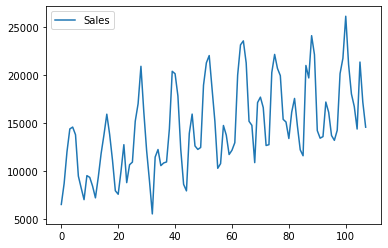

In [3]:
df.plot()
pyplot.show()

In [4]:
df.columns=['ds','y']
df['ds']=to_datetime(df['ds'])

In [5]:
model=Prophet()
model.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future=list()
for i in range(1,13):
    date='1969-%02d'%i
    print(date)
    future.append([date])
future=pd.DataFrame(future)
future.columns=['ds']
future['ds']=to_datetime(future['ds'])

1969-01
1969-02
1969-03
1969-04
1969-05
1969-06
1969-07
1969-08
1969-09
1969-10
1969-11
1969-12


In [7]:
forecast=model.predict(future)

In [8]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15396.026630,13792.042267,16888.162437
1,1969-02-01,16165.838547,14535.240169,17690.699822
2,1969-03-01,21369.121163,19778.013606,23013.077701
3,1969-04-01,23494.793981,21932.961441,25068.491591
4,1969-05-01,25004.900023,23430.863764,26661.102004
5,1969-06-01,22263.278413,20619.545697,23933.768473
6,1969-07-01,17926.533617,16412.628618,19631.562888
7,1969-08-01,15754.482263,14024.769182,17360.456016
8,1969-09-01,14262.071702,12654.063918,15803.493715
9,1969-10-01,18697.917520,17132.964294,20358.984174


In [9]:
import joblib
joblib.dump(model,"sales.sav")

['sales.sav']

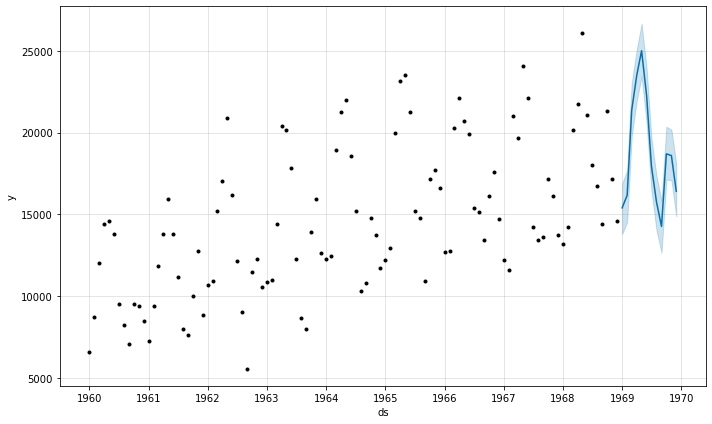

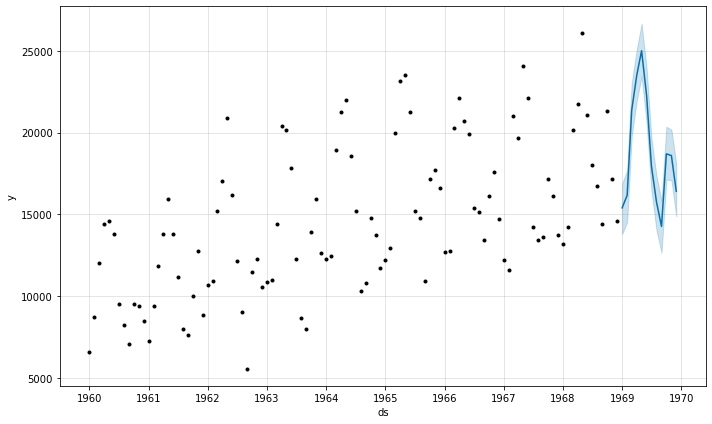

In [11]:
model.plot(forecast)